# Prediction of Breast Cancer Sub-types according to Proteome data

### Rationale
There are 4 different breast cancer sub-types: 'basal-lie', 'HER2', 'LumA', 'LumB'. The goal here is to predict breast cancer sub-types according to proteome data and advance the prediction precision

### Outline
1. import data and feature selection
2. Construct a MLP (Multilayer preceptron)
3. train and evaluation

### Result
The performance that we get is much better than the previous model. The prediction accuracy is about 80%.   
PS: it is super easy to overfit the data via MLP (>99% in training data, but ~60% in val/test data)

In [7]:
# import modules for this notebook

% matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import Imputer

### Import data and feature selection

In [8]:
merge = pd.read_csv('merge_proteome_clinic.csv', index_col=0)

In [9]:
proteome = merge.ix[:, :12553]

In [10]:
imputer = Imputer(missing_values='NaN', strategy='median', axis=1)
imputer = imputer.fit(proteome)
processed_proteome = imputer.transform(proteome)

In [458]:
X = processed_proteome

In [459]:
merge['PAM50 mRNA'] = merge['PAM50 mRNA'].astype('category')
merge['PAM50_mRNA_label'] = merge['PAM50 mRNA'].cat.codes

In [460]:
y = merge['PAM50_mRNA_label'].values

In [461]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, f_regression
test = SelectKBest(score_func=f_classif, k=185)
fit = test.fit(X, y)

In [462]:
features = fit.transform(X)

In [463]:
y = np_utils.to_categorical(y, 4)

In [464]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=42)

### Construct a MLP (MultiLayer Perceptron)

In [466]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

In [473]:
# create model

model = Sequential()
model.add(Dense(32, input_shape=(185,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(8))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(4))
model.add(Activation('softmax'))

In [474]:
# compile the model and use crossentropy for loss function
model.compile(loss='categorical_crossentropy',  \
              optimizer='adadelta', \
              metrics = ['accuracy'])

### Train and evaluation

dict_keys(['val_acc', 'acc', 'val_loss', 'loss'])


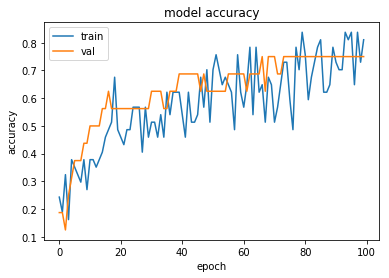

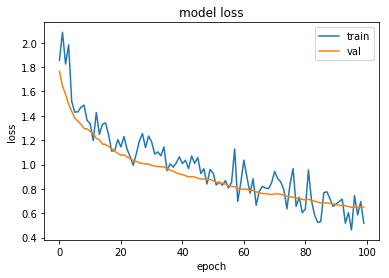

In [475]:
history = model.fit(X_train, y_train, \
                    validation_split=0.3, \
                    nb_epoch=100, \
                    batch_size=10, \
                    verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy history')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss history')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [478]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % ('The prediction accuracy in test data is', scores[1]*100))

The prediction accuracy in test data is: 79.17%
